170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: -22990746025984.0000 - accuracy: 0.1000 - val_loss: -132896262193152.0000 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: -990810367590400.0000 - accuracy: 0.1000 - val_loss: -2652836210933760.0000 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: -6959704056004608.0000 - accuracy: 0.1000 - val_loss: -13316159554191360.0000 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: -24901361388748800.0000 - accuracy: 0.1000 - val_loss: -40293072478666752.0000 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: -64179017699295232.0000 - accuracy: 0.1000 - val_loss: -94283594528194560.0000 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [====================

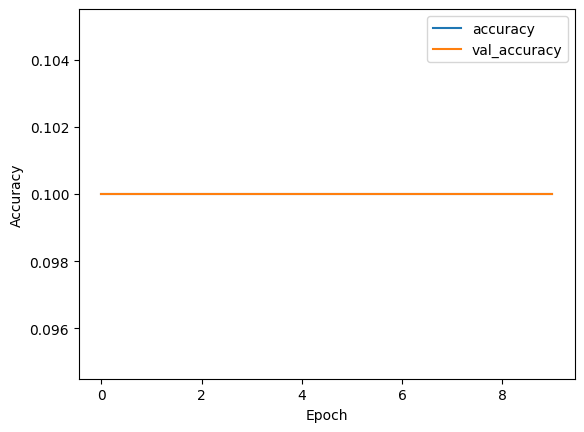

313/313 [==============================] - 4s 11ms/step - loss: -1361665298968608768.0000 - accuracy: 0.1000
Test accuracy: 0.10000000149011612
313/313 [==============================] - 4s 14ms/step


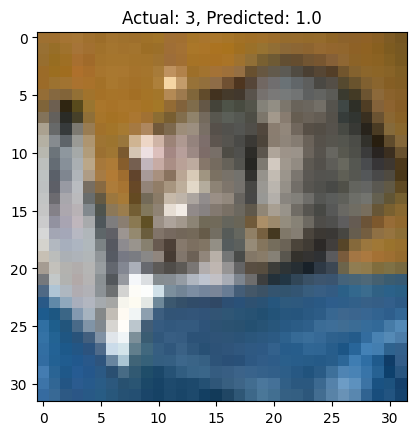

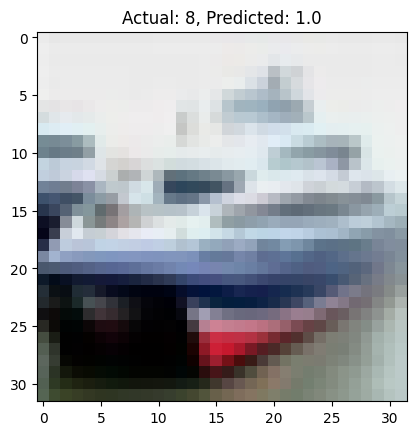

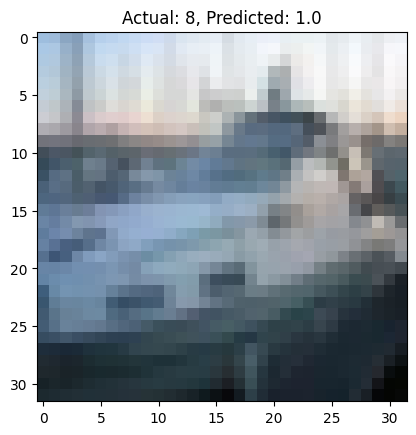

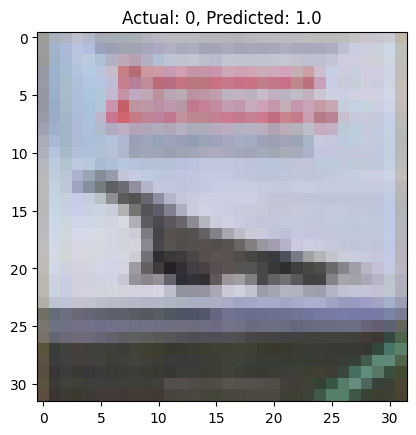

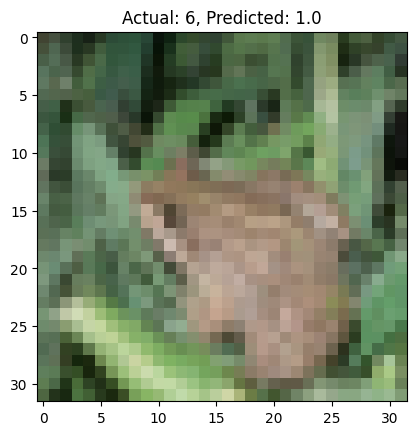

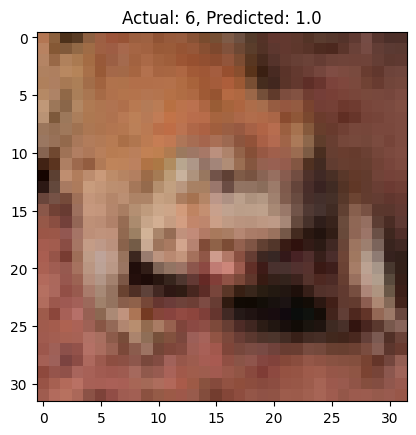

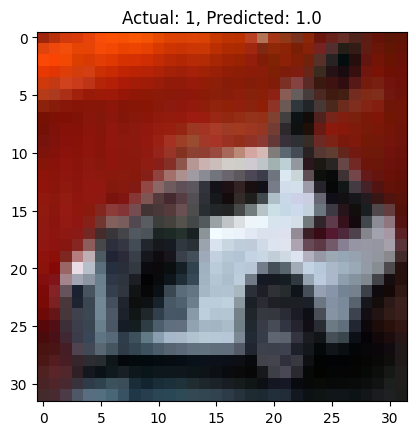

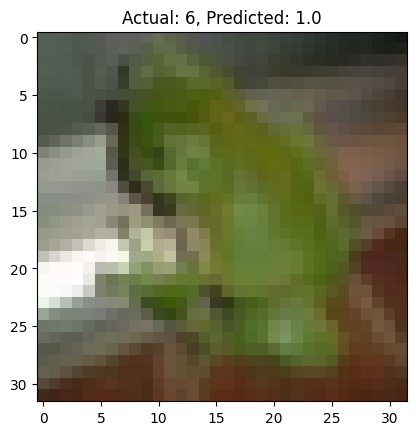

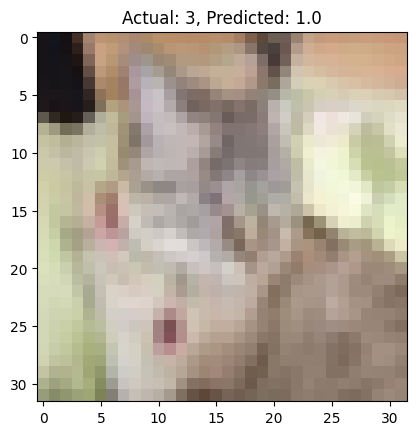

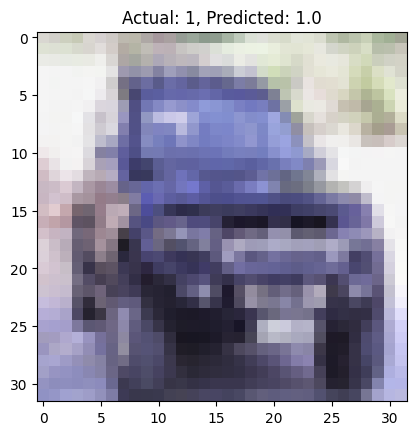

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to range 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Make predictions on test data
predictions = model.predict(test_images)

# Display sample predictions
for i in range(10):
    plt.imshow(test_images[i])
    plt.title(f"Actual: {test_labels[i][0]}, Predicted: {predictions[i][0]}")
    plt.show()
